In [1]:
import cobra
from mewpy.optimization.evaluation import BPCY,WYIELD
from mewpy.problems import GOUProblem
from mewpy.problems import ROUProblem
from mewpy.problems import GKOProblem
from mewpy.problems import RKOProblem
from mewpy.simulation import SimulationMethod, get_simulator
import warnings
from mewpy.optimization import EA

Set parameter Username
Academic license - for non-commercial use only - expires 2022-12-11


In [2]:
model = cobra.io.read_sbml_model('iJO1366_new.xml')

In [3]:
BIOMASS_ID = 'BIOMASS_Ec_iJO1366_core_53p95M'
PRODUCT_ID = 'prenylnaringenin_e'
O2 = 'EX_o2_e'
GLC = 'EX_glc__D_e'
envcond = {GLC: (-10.0, 100000.0), O2: (-1000,1000), BIOMASS_ID:(0.1,1000)}
model.objective = 'prenylnaringenin_e'
model.objective.expression

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.pFBA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

In [4]:
simulation = get_simulator(model,envcond= envcond) 
res = simulation.simulate(method='pFBA')
print(res)

objective: 670.391617519924
Status: OPTIMAL
Constraints: OrderedDict([('EX_glc__D_e', (-10.0, 100000.0)), ('EX_o2_e', (-1000, 1000)), ('BIOMASS_Ec_iJO1366_core_53p95M', (0.1, 1000))])
Method:pFBA


In [5]:
problem = GOUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem2 = ROUProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem3 = GKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)
problem4 = RKOProblem(model,[evaluator_1,evaluator_2 ],envcond = envcond)

Running NSGAII


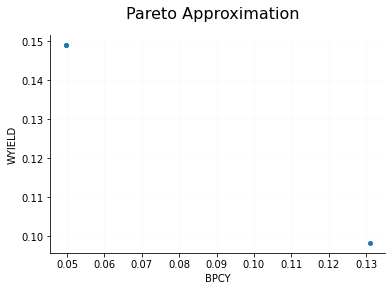

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.131087  0.031579  0.026338  0.025574|  0.000000  0.148883  0.094736  0.076064  0.069957|
    200|  0.030885  0.131087  0.049606  0.047926  0.010125|  0.092655  0.148883  0.148812  0.140829  0.017670|
    300|  0.049628  0.131087  0.049628  0.051257  0.011404|  0.098315  0.148883  0.148883  0.147872  0.007080|
    400|  0.049628  0.131087  0.049628  0.055330  0.020784|  0.098315  0.148883  0.148883  0.145344  0.012902|
    500|  0.049628  0.131087  0.049628  0.061847  0.029087|  0.098315  0.148883  0.148883  0.141298  0.018057|
    600|  0.049628  0.131087  0.049628  0.057774  0.024438|  0.098315  0.148883  0.148883  0.143827  0.015171|
    700|  0.049628  0.131087  0.049628  0.058588  0.025488|  0.098315  0.148883  0.148883  0.143321  0.015822|
    800|  0.049628  0.131087  0.049628  0.058588  0.025488|  0.098315  0.148883  0.148883  0.143321  0.015822|
 

In [6]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea = EA(problem, max_generations= 50, mp = True, visualizer = True)
final_pop = ea.run()

In [7]:
df = ea.dataframe()
df.to_csv('GOU_50gen.csv')
print(df)

   Modification  Size      BPCY    WYIELD
0            {}     0  0.049628  0.148883
1  {'b2529': 4}     1  0.131086  0.098315


Building modification target list.
Running NSGAII


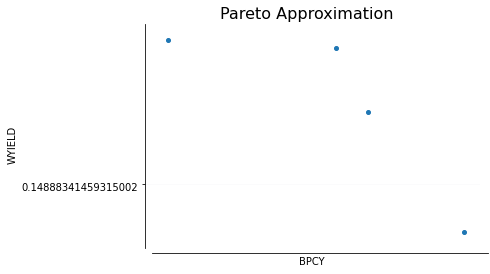

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.049628  0.049628  0.031482  0.023469|  0.000000  0.148883  0.148883  0.094445  0.070407|
    200|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    300|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    400|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    500|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    600|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    700|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    800|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
 

In [8]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea2 = EA(problem2, max_generations= 50, mp = True, visualizer = True)
final_pop2 = ea2.run()

In [9]:
df2 = ea2.dataframe()
df2.to_csv('ROU_50gen.csv')
print(df2)

        Modification  Size      BPCY    WYIELD
0  {'COBALT2tex': 4}     1  0.131086  0.098315


  0%|          | 0/1369 [00:00<?, ?it/s]

Building modification target list.
Computing essential genes.


100%|██████████| 1369/1369 [02:21<00:00,  9.68it/s]


Running NSGAII


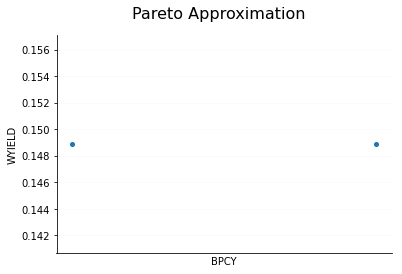

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.049628  0.049628  0.047545  0.007829|  0.000000  0.148883  0.148883  0.142634  0.023487|
    200|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    300|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    400|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    500|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    600|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    700|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    800|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
 

In [10]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea3 = EA(problem3, max_generations= 50, mp = True, visualizer = True)
final_pop3 = ea3.run()

In [11]:
df3 = ea3.dataframe()
df3.to_csv('GKO_50gen.csv')
print(df3)

  Modification  Size      BPCY    WYIELD
0           {}     0  0.049628  0.148883


  0%|          | 0/2600 [00:00<?, ?it/s]

Building modification target list.
Computing essential reactions


100%|██████████| 2600/2600 [03:30<00:00, 12.37it/s]


Running NSGAII


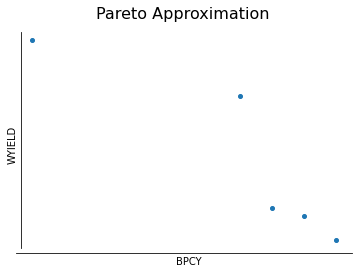

Eval(s)|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
    100|  0.000000  0.049628  0.049628  0.048987  0.004958|  0.000000  0.148883  0.148883  0.146962  0.014873|
    200|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    300|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    400|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    500|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    600|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    700|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
    800|  0.049628  0.049628  0.049628  0.049628  0.000000|  0.148883  0.148883  0.148883  0.148883  0.000000|
 

In [12]:
%matplotlib inline
warnings.filterwarnings("ignore")

ea4 = EA(problem4, max_generations= 50, mp = True, visualizer = True)
final_pop4 = ea4.run()

In [13]:
df4 = ea4.dataframe()
df4.to_csv('RKO_50gen.csv')
print(df4)

  Modification  Size      BPCY    WYIELD
0  {'ATPM': 0}     1  0.050318  0.150953
1           {}     0  0.049628  0.148883
